<h1><b> Data Quality Inspection Framework</b></h1>

<h3><b>|| Project Concept</b></h3>

The author has set an objective to group all standard dataset structural checks into one framework.
The desired outcome of the project is the creation of a script or class that can parse datasets and return information about various dataset key parameteres (value range, outliers, missing values, etc) in a consice and informative form.<br><br>

<h3>|| Analysis Framework</h3>

<b>1 Structural defects </b><br>
The below parameters may be easier to check during preprocessing in Excel.
<ul>
<li>The dataset is structurally integral(no missing rows or columns).
<li>Graphical formating is removed.
</ul>
<b>2 Missing values</b><br>
<ul>
<li>Replace or mark the missing values.
</ul>
<b>3 Data types</b><br>
<ul>
<li>Data types are suitable for the field category.
<li>Improper data types are corrected.
</ul>
<b>4 Outliers</b><br>
<b>5 Unique values</b><br>

<h2><b>PART 1 Structural defects: Missing Values and Data Types</b></h2>

<h3>Missing Values</h3>

In [42]:
def misCount(dataset):
    return dataset.isnull().sum()       
            

In [43]:
misCount(housing_df)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<h3>Data Types</h3>

In [40]:
def dataTypes(dataset):
    return dataset.dtypes

In [41]:
dataTypes(housing_df)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [44]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [45]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<h2><b>PART 2 Content defects: Outliers and Unique Values</b></h2>

<h4>NOTES</h4>
<ul>
    <li>Add Error handling</li>
    <li> The "count2" variable in outlDet has been removed</li>
    <li>Review data types</li>
</ul>

<h3><b>|| Project Objectives </b><h3>

This is the second part of the project which focuses on utliers and unique values. Below are listed the parameters that are isnpected after missing value and data type checks.

<p>
<b>1. Quantitative</b> 
    <br>
    => Outliers
    <br>
It is crucial to identify outliers at the first stages of dataset analysis as they can skew the statistics.
    <br>
<b>2. Qualitative</b>
    <br>
    => Unique category values
    <br>
For fields that hold categorical values, it is important to check whether all values are uniform. For example, if a temperature field is supposed to store "hot" and "cold" values, then 
finding "cool", "warm" or "hott" in the field would raise a need to amend these non-conforming values.   
</p>


<h3><b>|| The sample datasets used in this project</b></h3>

We will use freely-available datasets from Kaggle: "California Housing Prices", "Bicycle Buyer Trends" and "The 2021 Olympic Games Scores". 

<h3><b>|| Dataset and library import</b></h3>    

In [3]:
import pandas as pd 

In [4]:
import numpy as np

In [5]:
import matplotlib as mpl

In [6]:
import seaborn as sns 

In [7]:
import scipy

In [8]:
from scipy import stats

In [9]:
from statistics import mean 

In [10]:
housing_df = pd.read_csv("housing.csv")#, dtype={"total_rooms": np.int32}

In [11]:
medals_df = pd.read_excel("ol_medal.xls")

In [12]:
bikes = pd.read_csv("bike_buyers_clean.csv")

In [ ]:
import seaborn as sns 
import scipy
from scipy import stats
from statistics import mean 

<h3><b>|| Dataset statistics</b></h3>   

| An overview of the dataset 

In [13]:
housing_df.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


| Data type summary 

<h3><b>| 1. Quantitative Value Parameters </b><h3> 

<b><h4>=> Outlier detection</h4></b>

Here we will define a function that searches for outliers in a column and returns their number. Our function will work based on the principle of z-score evaluation. 

In [14]:
def outlDet(dframe, field):
    zsc = np.abs(scipy.stats.zscore(dframe[f"{field}"]))#Z-scores for each value.
    count = 0 
    for i in zsc:
        if i >= 3:
            count += 1
    print(f"{field}:{count}")

In [15]:
outlDet(housing_df, "total_bedrooms")

total_bedrooms:0


<b><h4> => Outlier removal<h4></b> 

By modifying the function defined in the previous step, we can create a new function that filters out the outliers and returns a new, outlier-free colum. The function generates a list of z-scores that correspond to each value of the column being inspected; if a value has a z-score of 3 or greater, then it gets discarded.<br><br>


In [16]:
def outlRem(dframe, field):
    zsc = np.abs(scipy.stats.zscore(dframe[f"{field}"]))#Z-scores for each value.
    filt_lst = []# Will hold the filtered values. 
    index = 0 #Index to help reference the zsc list.
    for i in dframe[f"{field}"]:
        if zsc[index] <3: #If the corresponding z-score is less than 3, the value (i) is appended to the filtered list.
            filt_lst.append(i)
        index +=1
    return filt_lst
    

Let us implement this function in exploring our sample dataset. We will analyse several columns that hold numeric data, and, if any outliers identified, we will call the function above to create a filtered copy of the field.<br><br>
We will calculate the mean value of the column before and after the outlier removal. Please note, that this is done only for the purpose of <b>demonstration</b>. Depending on the context, the outliers might actually be valid values.  

|A list of the California Housing Prices dataset columns with numeric data.

- Population

<AxesSubplot:xlabel='population'>

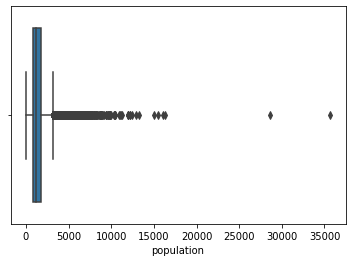

In [17]:
sns.boxplot(x = housing_df["population"])

In [18]:
outlDet(housing_df, "population")

population:342


Outliers present. The large number of outliers suggests that some areas have a signifficantly higher population. 

The mean of the column before outlier removal. 

In [19]:
housing_df["population"].mean()

1425.4767441860465

In [20]:
new_pop = outlRem(housing_df, "population")

The mean after outlier removal

In [21]:
mean(new_pop)

1333.286974086117

- Housing Median Age

<AxesSubplot:xlabel='housing_median_age'>

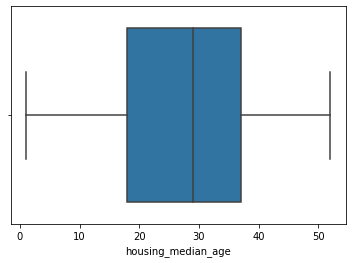

In [22]:
sns.boxplot(x = housing_df["housing_median_age"])

In [23]:
outlDet(housing_df, "housing_median_age")

housing_median_age:0


No outliers found. 

- Median House Value

<AxesSubplot:xlabel='median_house_value'>

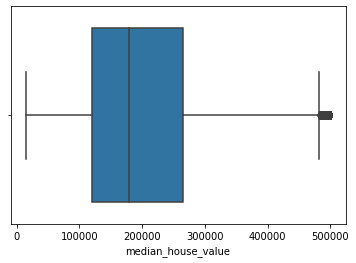

In [24]:
sns.boxplot(x = housing_df["median_house_value"])

In [25]:
outlDet(housing_df, "median_house_value")

median_house_value:0


Insignifficant number of outliers.

- Median Income

<AxesSubplot:xlabel='median_income'>

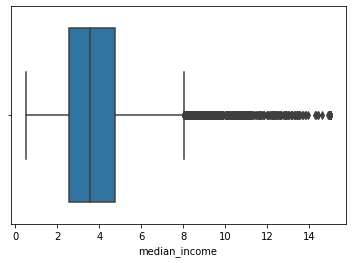

In [26]:
sns.boxplot(x = housing_df["median_income"])

In [27]:
outlDet(housing_df, "population")

population:342


Outliers present, but they seem to fit into the context of the data.

- Total rooms

<AxesSubplot:xlabel='total_rooms'>

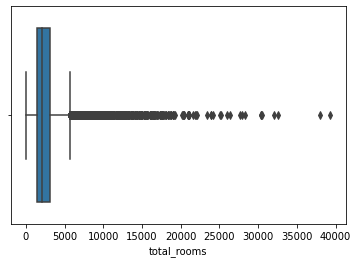

In [28]:
sns.boxplot(x = housing_df["total_rooms"])

In [29]:
outlDet(housing_df, "total_rooms")

total_rooms:373


A signifficant number of outliers. 

The mean before outlier removal.

In [30]:
housing_df["total_rooms"].mean()

2635.7630813953488

In [31]:
new_rooms = outlRem(housing_df,"total_rooms")

The mean after outlier removal. 

In [32]:
mean(new_rooms)

2438.065870627128

<b><h3>Conclusion</b></h3><br>
We have created two functions - outlRem and outlDet - that can help handle outliers in an efficient way. The outlDet function will inspect a column and return the number of outliers containted in it. Whereas the outRem function will help filter out the outliers.<br><br> 
Once again, the author would like to emphasise that examples above are only to demonstrate how the functions operate. In a real analysis, the outliers must be thoroughly checeked against the context of the data.<br><br>
Now, let us procede to qualitative (string) value handling. 

<h3><b>| 2. Qualitative Value Parameters </b><h3> 

<b>=>Unique category labels</b>

This cehck can be simply performed with the help of the "unique" function. The value and the number of times it occurs in the dataset will be displayed. This will help spot inconsistensies caused by, for example, typing errors.

In [33]:
housing_df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In the example above, the value count and their written form suggest that there are no input mistakes. If, for example, there was only one "1H Ocean" value, then we would have assumed that it was a mistyped value (instead of "Near Ocean").

<h3><b>|| Joinig the Functions in a Single Script</b></h3>

<h4><b>| The Concept</b></h4>

As stated at the beginning of the project, the main objective is to create a dataset inspection framework. In practical terms, we need to create a function whose input is the name of the dataframe being checked. The output should be a report on each column. 

<h4><b>| The Main Script</b></h4>

In [46]:
def iniParse(dataFr, multivar =[], bivar =[]):
    """
    This function is intended to identify content/semantic errors in a dataset
    by checking the outliers and categorical value distribution.
    """
    classes = ["<class 'numpy.float64'>", "<class 'numpy.int64'>", "<class 'numpy.integer'>","<class 'numpy.unsigned integer'>"]
    #Imports necessary packages.
    import seaborn as sns 
    import scipy
    from scipy import stats
    from statistics import mean 
    #Outlier detection function
    def outlDet(dframe, field):
        zsc = np.abs(scipy.stats.zscore(dframe[f"{field}"]))#Z-scores for each value.
        count = 0 
        for i in zsc:
            if i >= 3:
                count += 1
        print(f"{field}:{count}")
   
    print("-----Outlier count-----\n")
    for column in dataFr:
        if str(type(dataFr[column][1])) in classes:
            outlDet(dataFr, column)
            fig=mpl.pyplot.figure() 
            sns.boxplot(x=dataFr[column],ax=fig.add_axes([0, 0, 1.5, 1]))
            
    if len(multivar)!=0:
        print("\n-----Categorical value check-----\n||Multiple value columns\n") 
        for column in multivar:
            fig=mpl.pyplot.figure() 
            print(f"\nColumn:{column}\nValue distribution:\n",sns.boxplot(list(dataFr[f"{column}"].value_counts()),ax=fig.add_axes([0, 0, 1.5, 1])).set_title(column))
                
    if len(bivar)!=0:
        print("\n-----Categorical value check-----\n||Binary values\n")
        for column in bivar:
            print(dataFr[column].value_counts(),"\n")
    
    

<h3><b>|| Script Tests </b></h3>

Let us make our first test on the "Olympic medals 2021" datas set.  

In [35]:
medals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


-----Outlier count-----

Rank:0
Gold:3
Silver:3
Bronze:2
Total:3
Rank by Total:0

-----Categorical value check-----
||Multiple values



C:\Users\User\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Column:Team/NOC
Value distribution:
 Text(0.5, 1.0, 'Team/NOC')


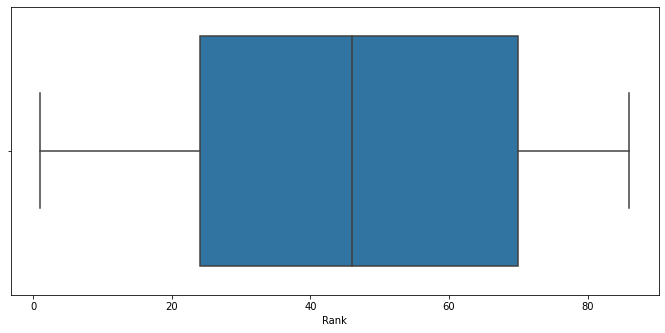

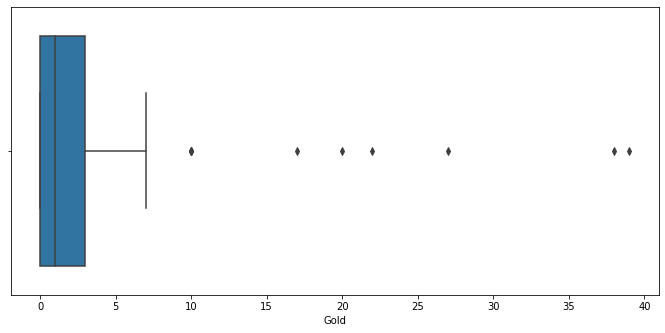

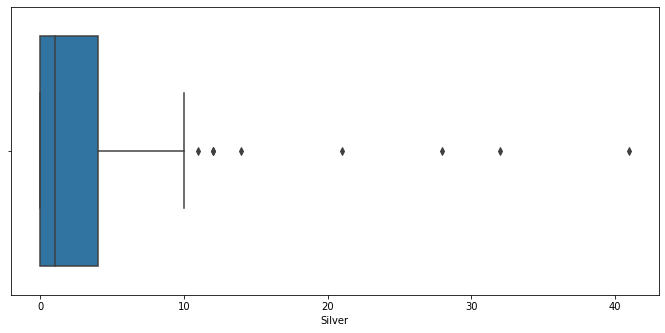

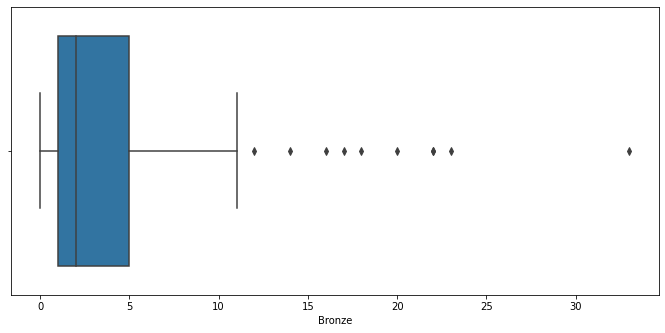

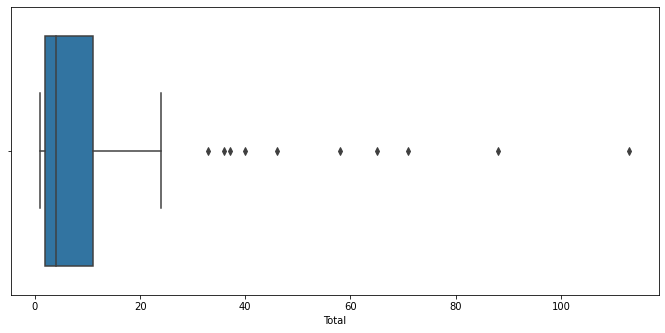

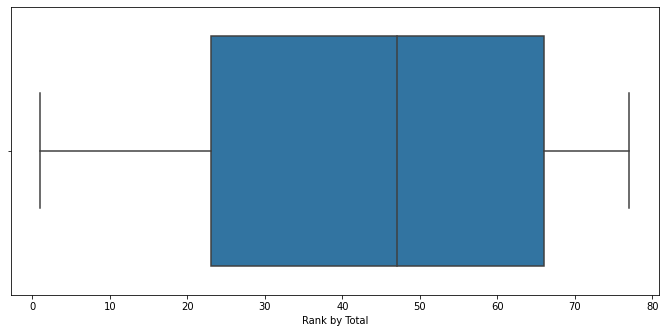

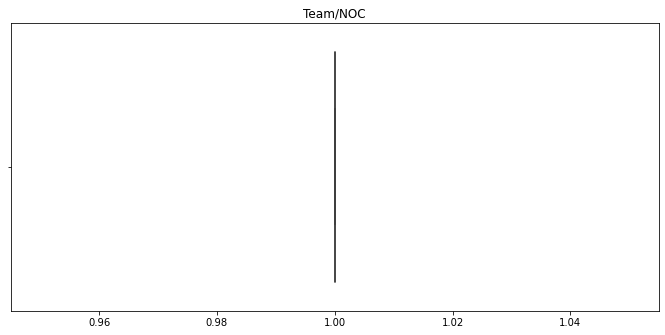

In [36]:
iniParse(medals_df, multivar=["Team/NOC"])

<b>Observation</b><br><br>
From the report above, we can see that there are a few numeric outliers. The outliers fit into the  context though, as some countries, like the US and the UK, have scored signifficantly more medals.<br><br>
Whereas with the column that holds the list of participating teams, there seems to be a duplicate. According to the boxplot all but one team appear in the list only once. Logically, a team can be listed only once. And indeed, one of the countries has been intentionally duplicated by the author for the purpose of demonstration.<br><br>
Thus, by means of visual methods, we have been alerted of an error in our dataset.

<h3><b>Test 2</b></h3>

We will crry out on a large dataset that contains data about bicycle buying trends. This is dataset is pre-processed. Only the "Commute Distance" column requires some amendments; we will skip this column for now. 

In [37]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                    --------------  ----- 
 0   ID;Marital Status;Gender;Income;Children;Education;Occupation;Home Owner;Cars;Commute Distance;Region;Age;Purchased Bike  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [47]:
iniParse(bikes, bivar=["Marital Status","Gender","Education","Occupation","Home Owner",
                 "Purchased Bike", "Region"])

-----Outlier count-----


-----Categorical value check-----
||Binary values



KeyError: 'Marital Status'

<b>Observation</b><br><br>
As expected, there are outliers in the "Income" column. The 2 outliers in the "Age" column, though need to be checked. <br><br>
Most of the categorical columns hold data with just a few unique values. Therefore, we did not use the "multivar" argument. All categorical values seem to be uniform. So we will only inspect the "Age" and "Income" columns. 

In [ ]:
sns.boxplot(bikes["Age"])

Apparently, there are a few, older cycling-enthusiasts in our dataset. We can only admire their  life-long passion and leave the set unchanged.<br><br>
On the other hand, an outlier with the value of, for example, "150" years would obviously be less credible. 

In [ ]:
sns.boxplot(bikes["Income"])

As with the previous column, it is quite likely that someone does have an income of ~160K. Therefore, withouth having additional knowledge about the dataset, we cannot be completely sure on whether this is a real income or just a typing error.<br><br>
To avoid distorting the data, we would "mask" these values before calculating statistics. 


<h3><b>|| Conclusion</b><h3>

At this stage of the project, we have created a script that we will later save into a code library, and then call it as method. Each time we will use our custom method, we will save several lines code, i.e. - time.<br><br>
A consice and informative report that the method produces, will help identify errors with  numeric and qualitative data quickly.<br><br>